In [1]:
from sklearn import datasets
from sklearn import metrics
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB 
import matplotlib.pyplot as plt
from pandas_ml import ConfusionMatrix 

In [2]:
newsgroups_train=datasets.fetch_20newsgroups(subset='train')
newsgroups_test=datasets.fetch_20newsgroups(subset='test')

In [3]:
newsgroups_train.keys()
newsgroups_train.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [4]:
vect=TfidfVectorizer()
X_train=vect.fit_transform(newsgroups_train.data)
X_test=vect.transform(newsgroups_test.data)

In [6]:
y_train=newsgroups_train.target
y_test=newsgroups_test.target

In [8]:
nbm=MultinomialNB()
nbm.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [13]:
pred=nbm.predict(X_test)

In [14]:
nbm.score(X_test,y_test)

0.7738980350504514

In [16]:
print(metrics.classification_report(y_test,pred))

             precision    recall  f1-score   support

          0       0.80      0.52      0.63       319
          1       0.81      0.65      0.72       389
          2       0.82      0.65      0.73       394
          3       0.67      0.78      0.72       392
          4       0.86      0.77      0.81       385
          5       0.89      0.75      0.82       395
          6       0.93      0.69      0.80       390
          7       0.85      0.92      0.88       396
          8       0.94      0.93      0.93       398
          9       0.92      0.90      0.91       397
         10       0.89      0.97      0.93       399
         11       0.59      0.97      0.74       396
         12       0.84      0.60      0.70       393
         13       0.92      0.74      0.82       396
         14       0.84      0.89      0.87       394
         15       0.44      0.98      0.61       398
         16       0.64      0.94      0.76       364
         17       0.93      0.91      0.92   

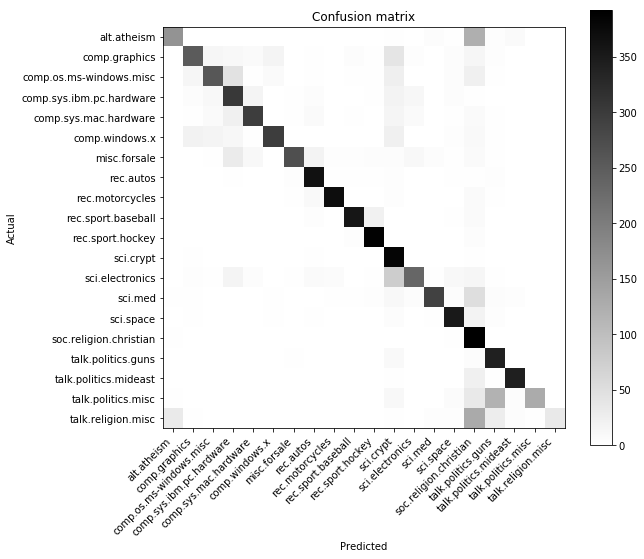

In [17]:
labels=list(newsgroups_train.target_names)
cm=ConfusionMatrix(y_test,pred,labels)
cm.plot()
plt.show()